<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [ ]:
#@title Current Date
Today = '2021-10-11' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Draft #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [7]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
!pip install gpy

     |████████████████████████████████| 959 kB 7.4 MB/s 
     |████████████████████████████████| 71 kB 13.2 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565100 sha256=17e29d281654546f4a83364683761f015bc45fd27ff1b024080a3077a2a6173f
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=42d81718df24d6be6f2404d086d38a58b88130e95992aee0d266390246aa7090
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [10]:
import seaborn as sns
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [210]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [211]:
Path = '/content/drive/My Drive/Data/ET5003_Etivity_3/'

train_data = Path + 'HousePrice_Train.csv'
test_data = Path + 'HousePrice_Test.csv'

# We don't need the sample submission, this needs to be created from model predictions, keeping it just for reference
#sample_submission = Path + 'sample_submission.csv'

In [212]:
# train data
df_train = pd.read_csv(train_data)
print("Training dataset shape : ",df_train.shape)

# test data
df_test = pd.read_csv(test_data)
print("Test dataset shape : ",df_test.shape)

# sample submission example
# df_sample = pd.read_csv(sample_submission)
# print("Sample_Submission dataset shape : ",df_sample.shape) 

Training dataset shape :  (1638, 14)
Test dataset shape :  (702, 13)


In [213]:
df_train.isna().sum()
#df_test.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [214]:
df_train.set_index('Index',inplace=True)
df_test.set_index('Index',inplace=True)

In [215]:
df_train.head(6)

,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
Index,,,,,,,,,,,,,
1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000
6,12225979,Glasnevin,1,3,E1,Property Team Lappin Estates take great pleasu...,NaN,None,53.380367,-6.279310,terraced,140.00,360000


In [216]:
df_test.head()

,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
Index,,,,,,,,,,,,
1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [217]:
df_train.dtypes

ID                 int64
Location          object
Num_Bathrooms      int64
Num_Beds           int64
BER_class         object
Description       object
Services          object
Features          object
Latitude         float64
Longitude        float64
Type              object
Surface          float64
Price              int64
dtype: object

In [218]:
df_train.describe()
#df_test.describe()

,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


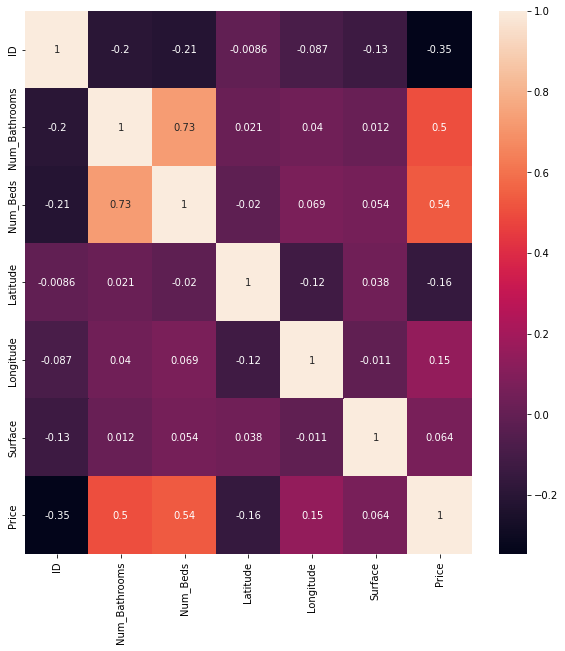

In [219]:
plt.figure(figsize = (10,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

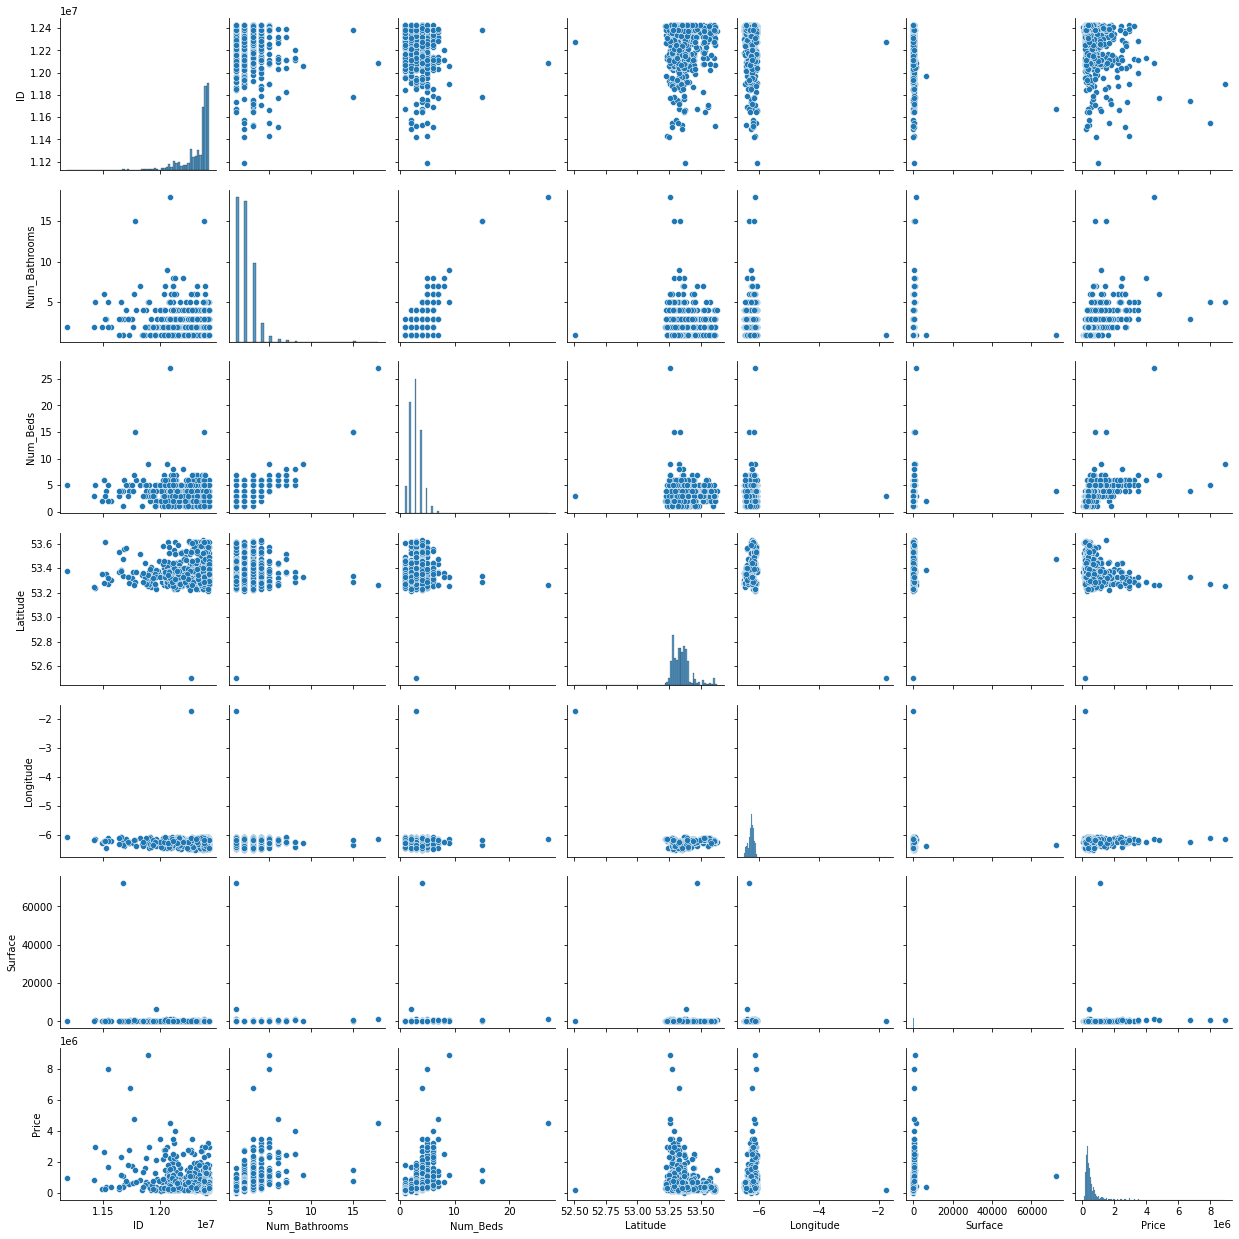

In [220]:
sns.pairplot(df_train)
plt.show()
# sns.pairplot(df_test)
# plt.show()

Some of the numberical features contain outliers which I will remove to make the training data evenly distributed

In [221]:
# Removing numerical outliers
def remove_outliers(df_train, num_columns, threshold = 1.5):

  if (type(num_columns) == list):

    for i,col in enumerate(num_columns):
      q1 = df_train[col].quantile(0.25)
      q3 = df_train[col].quantile(0.75)
      iqr = q3 - q1     
      df_no_outlier = df_train[(df_train[col] > q1 - threshold*iqr ) & (df_train[col] < q3 + threshold*iqr)]
  
  elif (type(num_columns)==str):

    q1 = df_train[num_columns].quantile(0.25)
    q3 = df_train[num_columns].quantile(0.75)
    iqr = q3 - q1     
    df_no_outlier = df_train[(df_train[num_columns] > q1 - threshold*iqr ) & (df_train[num_columns] < q3 + threshold*iqr)]
  else:
    print('Please select either one feature or list of features')

  return df_no_outlier

In [222]:
num_columns = ['Num_Bathrooms','Num_Beds','Surface']

df_train = remove_outliers(df_train,num_columns[0:2])

#df_train = remove_outliers(df_train,num_columns[2],threshold=3)

In [223]:
#df_train = remove_outliers(df_train,num_columns[2],threshold=5)

In [224]:
df_train = df_train[(df_train['Surface']<5000)]

In [225]:
df_train[(df_train['Latitude']<53) | (df_train['Longitude']>-4)]

,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
Index,,,,,,,,,,,,,
356,12270559,Clondalkin,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,NaN,None,52.501856,-1.744995,semi-detached,79.0,199000


Looking at the earlier pairplots, there is one outlier for both Latitude and Longitude.       
After investigating further, the  co-ordinates are for an address in Birmingham,UK, so I will drop this example

In [226]:
df_train.drop(index=356,axis=1,inplace=True)


## Cathegorical variables

In [227]:
ber_mapper = {
    'A1':1,'A2':2,'A3':3,
    'B1':4,'B2':5,'B3':6,
    'C1':7,'C2':8,'C3':9,
    'D1':10,'D2':11,
    'E1':12,'E2':13,
    'F':14,
    'G':15,
    'SINo666of2006exempt':16,
    np.nan:17
}

df_train['BER_class'] = df_train['BER_class'].replace(ber_mapper)
df_test['BER_class'] = df_test['BER_class'].replace(ber_mapper)

In [228]:
df_train[['Type','Price']].groupby(['Type']).mean().sort_values(by='Price')

,Price
Type,
studio,2.425000e+05
apartment,3.302488e+05
duplex,3.465455e+05
end-of-terrace,4.572628e+05
townhouse,4.775000e+05
terraced,4.875207e+05
bungalow,5.381956e+05
semi-detached,5.381967e+05
site,7.500000e+05


In [229]:
# df_train = pd.get_dummies(df_train, columns=['Type'], drop_first=False)
# df_test = pd.get_dummies(df_test, columns=['Type'], drop_first=False)

type_map = {
     'apartment':2,
     'bungalow':7,
     'detached':8, 
     'duplex':1,
     'end-of-terrace':3,
     'semi-detached':6,
     'site':9,
     'studio':0,
     'terraced':4,
     'townhouse':5
    
}
df_train['Type'] = df_train['Type'].replace(type_map)
df_test['Type'] = df_test['Type'].replace(type_map)

As `BER_Class` is an ordinal cathegorical variable I have decided to encode with the use of the mapper above. I have inputed NaN values with the last class, however I may revisit this decision. It might be worthwhile to impute a value for one of the existing BER ratings.      
I have encoded `Type` with the mapper above,  based on ordering the mean Price of property for each class. Initially I had one hot encoded this feature but this led to some issues as not all of the test set had observations in each property type.
  

In [230]:
#df_train.isna().sum()
#df_test.isna().sum()

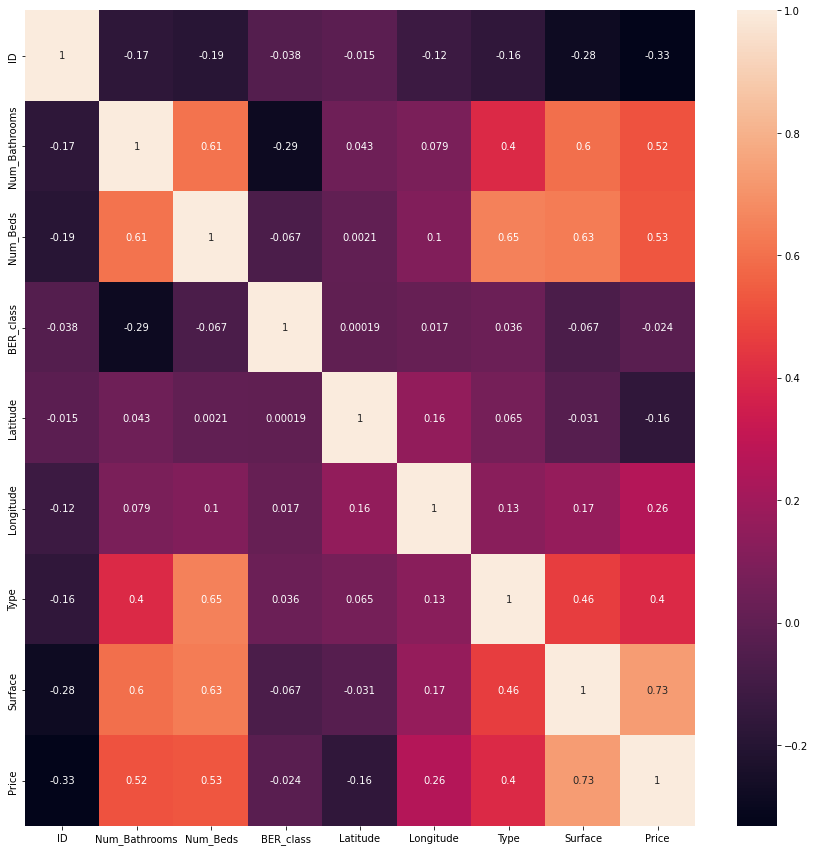

In [231]:
plt.figure(figsize = (15,15))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

# sns.pairplot(df_train)
# plt.show()


In [232]:
df_train.columns

Index(['ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
       'Description', 'Services', 'Features', 'Latitude', 'Longitude', 'Type',
       'Surface', 'Price'],
      dtype='object')

In [233]:
df_test.columns

Index(['ID', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
       'Description', 'Services', 'Features', 'Latitude', 'Longitude', 'Type',
       'Surface'],
      dtype='object')

In [234]:
df_cost = df_train['Price']
df_train.drop(['ID','Location','Price'],axis=1,inplace=True)
df_test.drop(['ID','Location'],axis=1, inplace=True)
df_test.head()

,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
Index,,,,,,,,,,
1639,2,2,8,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,5,65.0
1640,2,5,12,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,6,142.0
1641,1,2,15,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,8,80.0
1642,4,4,2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,8,209.0
1643,2,3,14,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,3,108.0


## Training & Test Data

In [235]:
# # split data into training and test
# from sklearn.model_selection import train_test_split

# # training: 70% (0.7), test: 30% (0.3) 
# # you could try any other combination 
# # but consider 50% of training as the low boundary
# X_train,X_test,y_train,y_test = train_test_split(df_train.drop('Price',axis=1), df_train['Price'], test_size=0.3)

### Train dataset

In [236]:
# show first data frame rows 
df_train.head(3)

,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
Index,,,,,,,,,,
1,2,2,9,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,2,67.00
2,1,2,10,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,4,95.97
3,3,3,3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,6,107.00


In [237]:
# Generate descriptive statistics
df_train.describe()

,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface
count,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000,1617.000000
mean,1.996289,2.973408,10.946815,53.351080,-6.258055,4.542981,118.204002
std,1.013516,1.099577,3.821790,0.074032,0.091837,2.162527,86.343714
min,1.000000,1.000000,1.000000,53.215381,-6.497000,0.000000,3.400000
25%,1.000000,2.000000,8.000000,53.294461,-6.309640,2.000000,72.400000
50%,2.000000,3.000000,11.000000,53.341263,-6.247912,4.000000,96.480000
75%,3.000000,4.000000,14.000000,53.382401,-6.194687,6.000000,134.000000
max,8.000000,6.000000,17.000000,53.630588,-6.054719,9.000000,1195.000000


### Test dataset

In [238]:
# show first data frame rows 
df_test.head(3)

,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
Index,,,,,,,,,,
1639,2,2,8,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,5,65.0
1640,2,5,12,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,6,142.0
1641,1,2,15,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,8,80.0


In [239]:
# Generate descriptive statistics
df_test.describe()

,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,2.027066,2.987179,10.968661,53.350445,-6.252411,4.450142,132.603530
std,1.071273,1.198480,3.931894,0.073961,0.091600,2.182068,330.347066
min,1.000000,1.000000,2.000000,53.214227,-6.521183,1.000000,32.100000
25%,1.000000,2.000000,8.000000,53.295225,-6.304258,2.000000,73.000000
50%,2.000000,3.000000,11.000000,53.341153,-6.247799,4.000000,99.200000
75%,3.000000,4.000000,14.000000,53.381752,-6.184277,6.000000,136.875000
max,9.000000,14.000000,17.000000,53.617443,-6.057150,9.000000,8576.000000


### Expected Cost dataset

In [240]:
df_cost.head()

Index
1    195000
2    425000
3    535000
4    499000
5    510000
Name: Price, dtype: int64

In [241]:
# # Generate descriptive statistics
df_cost.describe()

count    1.617000e+03
mean     5.384643e+05
std      4.995053e+05
min      1.999500e+04
25%      2.950000e+05
50%      3.950000e+05
75%      5.950000e+05
max      7.950000e+06
Name: Price, dtype: float64

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

Your comments, explanation, and references here.

### NLP of Text data

In [242]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.tree import DecisionTreeRegressor as dtr
from  sklearn.metrics import mean_squared_error, mean_absolute_error


In [243]:
nlp_features = ["Description","Services", "Features"] 
df_train_text =df_train[nlp_features]
df_train_text.head()

,Description,Services,Features
Index,,,
1,DNG are delighted to present to the market no....,NaN,None
2,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...
3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...
4,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...
5,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...


In [244]:
df_train_text.isna().sum()

Description       0
Services       1043
Features          0
dtype: int64

In [245]:
def nlp_tasks(data, min_chars = 3):
  """
  Function performing all the NLP pre-processing tasks to an Pandas DataFrame
  Tasks are as follows:
  1.Remove all characters which are not letters
  2.Remove all short words under a lenght defined by min_chars 
  3.Convert everything to lower case
  4.Tokenization of all words
  5.Remove all stop words 
  6.De-tokenization 

  Args:
  data: Pandas Dataframe containing object or text only features
  min_chars: Integer defining the minimun length of words to retained, default = 3

  Returns:
  Pandas DataFrame after applying the NLP preprocessing tasks
  
  """

  # I will replace all NaN with an empty string to make it the data easier to process
  data.replace(np.nan, "", inplace=True)

  for col in data.columns:
    text_list = data[col].tolist()
    text_df = pd.DataFrame({col : text_list})

    # removing everything except letters
    text_df[col] = text_df[col].str.replace("[^a-zA-Z#]", " ")

    # removing short words, this is user defined by the variable min_chars
    text_df[col] = text_df[col].apply(lambda x: ' '.join([w for w in x.split() if len(w)>min_chars]))

    # make all text lowercase
    text_df[col] = text_df[col].apply(lambda x: x.lower())
    
    # tokenization
    tokenized_doc = text_df[col].apply(lambda x: x.split())
    # remove stop-words
    tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
    
    # de-tokenization
    detokenized_doc = []
    for i in range(len(text_df)):
      t = ' '.join(tokenized_doc[i])
      detokenized_doc.append(t)
    
    data[col] = detokenized_doc
    
  return data

In [246]:
#####################################################################################################################################################################################################################
#####################################################################################################################################################################################################################

In [247]:
# Rough Work, was trying to see if I could create function to find a set of all bigrams or trigrams to investigate further


# from nltk import ngrams
# def find_ngrams(data, k=2):
#   n_gram = []
#   for feat in data:
#     for example in feat:
#       n_gram = str(ngrams(feat.split(),k))

#   return n_gram

# grams = find_ngrams(df_train_txt_clean)


# from nltk.util import ngrams
# def ngramconvert(df,n=3):
#     df_new = pd.DataFrame()
#     for item in df.columns:
#         df_new['new'+item]=df[item].apply(lambda sentence: list(ngrams(sentence.split(), n)))
#     return df_new
# df_train_txt_clean.columns

### Retrain NLP with all data combined 

In [248]:
all_txt = pd.concat([df_train[nlp_features], df_test[nlp_features]])

In [249]:
all_clean_txt = nlp_tasks(all_txt)

##### TF-IDF Vectorization

In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,2),  max_df=0.5, smooth_idf=True) #max_features= 300,
print(vectorizer)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


In [251]:
XA = vectorizer.fit_transform(all_clean_txt['Description'])
XB = vectorizer.fit_transform(all_clean_txt['Services'])
XC = vectorizer.fit_transform(all_clean_txt['Features'])

In [252]:
from scipy.sparse import hstack

X_total =hstack((XA,XB,XC),format='csr')
#X1.shape
#X2.shape
#X3.shape
X_total.shape

(2319, 165828)

In [253]:
X_train_full = X_total[0:len(df_train),:]
y_full = df_cost

print(X_train_full.shape)
print(y_full.shape)


(1617, 165828)
(1617,)


In [254]:
X_submission = X_total[len(df_train):,:]

print(X_submission.shape)

(702, 165828)


In [255]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_full, test_size = 0.30, random_state = 0)

Training the NLP features into a regression model to make predictions on the test set

WIP: trying different algorithms to see what works

Need to revisist: see if I can incorporate these NLP features with the existing numerical and encoded features and use that data to build a prediction model

##### Random Forest Regressor 

In [256]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.tree import DecisionTreeRegressor as dtr

rf_reg = rfr(n_estimators=4,criterion="mse",n_jobs=-1,random_state=rand_state) # criterion=absolute_error
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=4, n_jobs=-1, oob_score=False,
                      random_state=11, verbose=0, warm_start=False)

In [257]:
# Using the model to predict House Prices

prediction_train = rf_reg.predict(X_train)

prediction_test = rf_reg.predict(X_val)

In [258]:
def rmsle(y_predicted, y_actual):
  """
  Function to calculate the root mean squared log error(RMSLE)
  Returns RMSLE
  """

  return np.sqrt(mean_squared_error((np.log(y_predicted)+1),(np.log(y_actual)+1) ) )

In [259]:
#from  sklearn.metrics import mean_squared_error, mean_absolute_error

# accuracy in training set
y_pred_train = prediction_train
print("Train Accuracy: ", rmsle(y_train,y_pred_train))

# accuracy in test set (unseen data)
y_true = y_val
y_pred_test = prediction_test
print("Validation Accuracy: ", rmsle(y_true, y_pred_test))

Train Accuracy:  0.1904944383043662
Validation Accuracy:  0.4079003784065476


In [260]:
# submission_pred = pd.DataFrame(rf_reg.predict(X_submission))

# index = pd.Series(df_test.index.to_list())
# submission_data = pd.concat([index,submission_pred],axis=1)
# submission_data.set_axis(['Index','Price'],axis=1,inplace=True)
# submission_data.set_index('Index',inplace=True)
# submission_data.to_csv(Path+'ET5003_Kaggle_BarryLawton_20197772.csv',index=True)

## Building a ML model to predict house prices

# Full Regression Model
Work in progress....

In [261]:
#df_train.head()
df_train.columns

Index(['Num_Bathrooms', 'Num_Beds', 'BER_class', 'Description', 'Services',
       'Features', 'Latitude', 'Longitude', 'Type', 'Surface'],
      dtype='object')

In [262]:
#
# pwise_feats_train = ['Num_Bathrooms', 'Num_Beds', 'BER_class', 'Latitude', 'Longitude', 'Surface', 'Type_apartment','Type_bungalow', 'Type_detached', 'Type_duplex',
#                     'Type_end-of-terrace','Type_semi-detached', 'Type_site', 'Type_studio', 'Type_terraced','Type_townhouse']

# pwise_feats_test = [feat for feat in pwise_feats_train if feat != 'Type_studio']
#  'Description', 'Services','Features',

In [263]:
pwise_feats_train = ['Num_Bathrooms', 'Num_Beds', 'BER_class','Latitude', 'Longitude', 'Type', 'Surface']

# # dropna: remove missing values
df_train_pw = df_train[pwise_feats_train].dropna(axis=0)
df_train_cost = df_cost[df_cost.index.isin(df_train_pw.index)]
     
df_test_pw  =  df_test[pwise_feats_train].dropna(axis=0)

# # cost
# df_cost = df_cost[df_cost.index.isin(df_subset_test.index)]

In [264]:
#df_train[pwise_feats_train].columns

In [265]:
#df_test[pwise_feats_test].columns

In [266]:
X_train , X_val, y_train, y_val = train_test_split(df_train_pw,df_train_cost,test_size = 0.25, random_state = rand_state)

In [267]:
#type(X_val)
#y_train
#y_val.index

In [268]:
# train set, inputs
Xs_train = X_train.values

# train set, output variable, price
ys_train = y_train.values.reshape(-1,1)

# validation set, will be used to evaluate models performance
Xs_val = X_val.values
ys_val = y_val.values


#test set, inputs, will be used to make predictions for the submission
Xs_test = df_test_pw.values

# X_train_index = X_train.index
# y_train_index = y_train.index
# X_val_index = X_val.index
# y_val_index = y_val.index

# X_test  = df_test_pw.index


In [269]:
#Xs_val.shape
#Xs_test.shape

In [270]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_val = np.hstack([Xs_val,Xs_val[:,[2]]**2])
Xn_val = xscaler.transform(Xss_val)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

In [271]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

Finished [100%]: Average Loss = 1,031.3


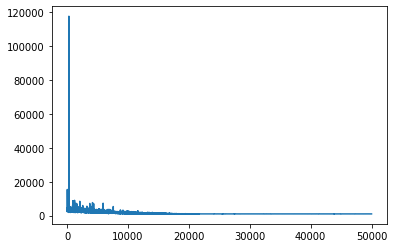

In [272]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [273]:
# samples from the posterior
posterior = approximation.sample(5000)

In [274]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_val.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("RMSLE on the validation data = ",(rmsle(y_pred_BLR,ys_val)))
print("MAPE on the validation data = ",(np.mean(abs(y_pred_BLR - ys_val) / ys_val)))

RMSLE on the validation data =  0.317682046520851
MAPE on the validation data =  0.2613992525416609


In [275]:
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_submission_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]

# submission_pred = pd.DataFrame(y_submission_BLR)

# index = pd.Series(df_test.index.to_list())
# submission_data = pd.concat([index,submission_pred],axis=1)
# submission_data.set_axis(['Index','Price'],axis=1,inplace=True)
# submission_data.set_index('Index',inplace=True)
# submission_data.to_csv(Path+'ET5003_Kaggle_BarryLawton_20197772.csv',index=True)

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

############################

Code from Etivity 2 for Reference

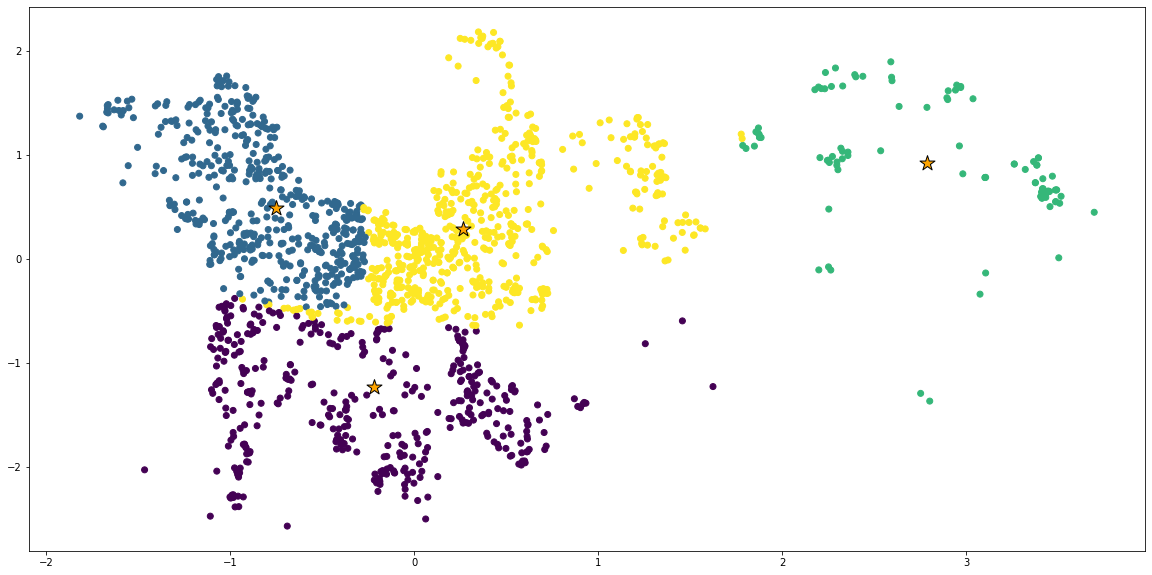

In [321]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
# clustering by features longitude and latitude
ind=[3,4]
X_ind = np.vstack([Xn_train[:,ind],Xn_val[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)

labels = gmm.fit_predict(X_ind)

# plot blue dots
plt.figure(figsize=(20,10))
plt.scatter(X_ind[:,0],X_ind[:,1],c=labels)
# centroids:  orange stars
plt.scatter(gmm.means_[:,0],gmm.means_[:,1],color='orange',edgecolor= 'black',marker='*',s=250)

In [278]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))



{0: 361, 1: 75, 2: 310, 3: 466}

In [298]:
# validation clusters
clusters_val = gmm.predict(Xn_val[:,ind])
unique_val, counts_val = np.unique(clusters_val, return_counts=True)
dict(zip(unique_val, counts_val))



{0: 217, 1: 39, 2: 159, 3: 287}

In [280]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xvaln0 = Xn_val[clusters_val==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)


In [281]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xvaln1 = Xn_val[clusters_val==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [282]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xvaln2 = Xn_val[clusters_val==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)


In [283]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xvaln3 = Xn_val[clusters_val==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

## Piecewise Model

In [284]:
def piecewise_model(Xn0, yn0, iter = 40000, samples = 5000):
  # model_0
 with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])


 with model_0:
  # iterate the algorithm
  approximation = pm.fit(40000,method='advi')

 posterior = approximation.sample(5000)
 return posterior

In [285]:
posterior0 = piecewise_model(Xn0, yn0)

Finished [100%]: Average Loss = 230.14


In [286]:
posterior1 = piecewise_model(Xn1, yn1)

Finished [100%]: Average Loss = 106.78


In [287]:
posterior2 = piecewise_model(Xn2, yn2)

Finished [100%]: Average Loss = 257.19


In [288]:
posterior3 = piecewise_model(Xn3, yn3)

Finished [100%]: Average Loss = 469.98


In [289]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred


##Simulations

### Only Cluster 0

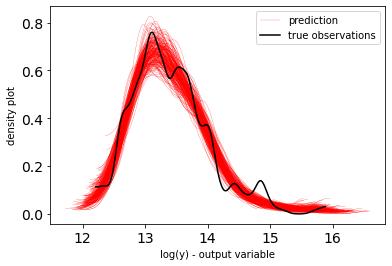

In [290]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Only Cluster 1

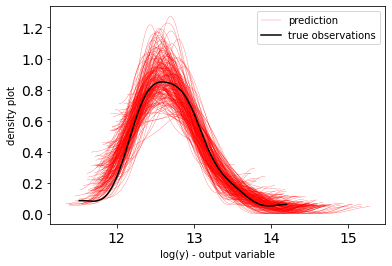

In [291]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Only Cluster 2


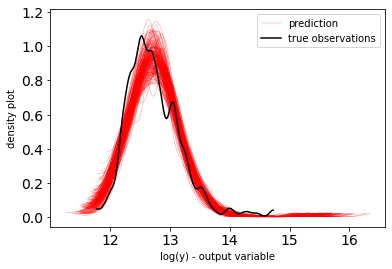

In [292]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

Only Cluster 3

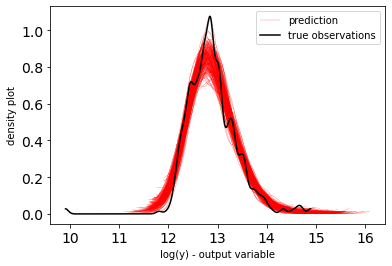

In [293]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Overall

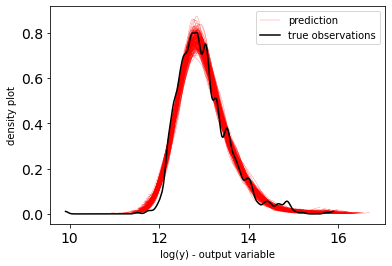

In [294]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])
az.plot_dist(ylog,color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Test set performance

In [296]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xvaln0.T)))
print("Size Cluster0", np.sum(clusters_val==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - ys_val[clusters_val==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xvaln1.T)))
print("Size Cluster1", np.sum(clusters_val==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - ys_val[clusters_val==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xvaln2.T)))
print("Size Cluster2", np.sum(clusters_val==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - ys_val[clusters_val==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xvaln3.T)))
print("Size Cluster3", np.sum(clusters_val==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - ys_val[clusters_val==3]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - ys_val[clusters_val==0]),
                 abs(y_pred_BLR1 - ys_val[clusters_val==1]),
                 abs(y_pred_BLR2 - ys_val[clusters_val==2]),
                 abs(y_pred_BLR3 - ys_val[clusters_val==3])])

# MAE
print("MAE on the test dataset =",np.mean(joint))

Size Cluster0 137 , MAE Cluster0= 459881.9490380862
Size Cluster1 21 , MAE Cluster1= 67364.40938535336
Size Cluster2 94 , MAE Cluster2= 69354.84322487732
Size Cluster3 153 , MAE Cluster3= 96912.11939890933
MAE on the test dataset = 211766.39295427615



### PPC on the validation set



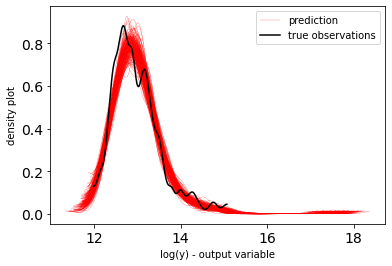

In [297]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xvaln0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xvaln1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xvaln2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xvaln3, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(ys_val),color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

########################

In [ ]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))

Ysub_pred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))

for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,color = 'black',label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

#### Submission Piecewise Predictions

In [343]:
#submission prediction clusters

clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
print(dict(zip(unique_test, counts_test)))


#cluster 0 
Xtestn0 = Xn_test[clusters_test == 0,:]

#cluster 1 
Xtestn1 = Xn_test[clusters_test == 1,:]

#cluster 2 
Xtestn2 = Xn_test[clusters_test == 2,:]

#cluster 3
Xtestn3 = Xn_test[clusters_test == 3,:]


# cluster 0 prediction
y_sub_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))

# cluster 1 prediction
y_sub_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))

# cluster 1 prediction
y_sub_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))

# cluster 3 prediction
y_sub_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))


{0: 158, 1: 217, 2: 39, 3: 288}


In [355]:
clusters_test
#len(clusters_test)
#Xn_test.shape

array([1, 3, 1, 3, 3, 3, 0, 1, 3, 1, 3, 1, 0, 3, 1, 3, 1, 0, 3, 0, 1, 0,
       1, 1, 0, 1, 1, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 0, 3, 1, 3, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 2, 1, 0, 1, 2, 3, 3, 0, 1,
       1, 3, 3, 1, 1, 0, 1, 3, 2, 1, 0, 1, 1, 1, 3, 3, 1, 2, 3, 3, 3, 1,
       1, 3, 3, 3, 1, 0, 1, 0, 3, 3, 0, 1, 3, 0, 3, 1, 1, 3, 1, 1, 0, 0,
       1, 3, 3, 0, 3, 0, 3, 3, 3, 1, 0, 3, 3, 1, 0, 2, 0, 0, 1, 1, 0, 0,
       1, 3, 3, 3, 3, 0, 1, 3, 0, 3, 1, 3, 1, 1, 1, 0, 3, 3, 3, 0, 1, 3,
       1, 0, 1, 0, 1, 1, 3, 1, 3, 2, 1, 3, 1, 1, 3, 0, 2, 1, 3, 0, 3, 2,
       3, 0, 2, 3, 3, 1, 0, 3, 3, 0, 1, 3, 3, 1, 1, 1, 3, 1, 2, 1, 3, 3,
       3, 3, 0, 1, 3, 1, 2, 1, 3, 0, 0, 1, 0, 0, 3, 1, 0, 3, 3, 2, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 3, 0, 3, 1, 3, 1, 3, 3, 3, 3, 0, 3, 2, 0, 3,
       3, 3, 0, 3, 1, 1, 0, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 3, 1, 0, 3, 1, 3, 2, 3, 3, 1, 0,
       1, 3, 3, 1, 2, 1, 0, 0, 3, 1, 1, 3, 0, 1, 1,

In [348]:
#index_list = np.where(Xn_test[clusters_test==1,:])[0]
#np.where(Xn_test[clusters_test==0,:])[0]

(array([  0,   0,   0, ..., 157, 157, 157]), array([0, 1, 2, ..., 5, 6, 7]))

In [ ]:
# I need to find a list of index for each cluster and then combine to make submission list


# submission_pred = pd.DataFrame(y_submission_BLR)

# index = pd.Series(df_test.index.to_list())
# submission_data = pd.concat([index,submission_pred],axis=1)
# submission_data.set_axis(['Index','Price'],axis=1,inplace=True)
# submission_data.set_index('Index',inplace=True)
# submission_data.to_csv(Path+'ET5003_Kaggle_BarryLawton_20197772.csv',index=True)

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.